In [1]:
import numpy as np
import pandas as pd

import re

data = pd.read_csv('/kaggle/input/ys19-2023-assignment-3/train_set.csv')

pd.set_option('max_colwidth', None)
data.head()

print(data['Text'])

0                                     #απολυμανση_κοριοι #απεντομωση_κοριος #απολυμανσεις #κοριος#Alphatv #Την Κυριακη  #Κουλης #Τσιπρα #F-35 Κοριοί απολύμανση - Καταπολέμηση κοριών - Απεντόμωση για κοριούς https://t.co/Wly4WIUAxT
1                                                                                                                 Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη ΝΔ - Ο Μητσοτάκης γνώριζε και δίχασε το έθνος https://t.co/g4alBWyKdW
2                                                                                                                                                                  Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στους καθημερινούς αγώνες
3                                                                                                              @five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25  #Εκλογες_2019 #8iouliou #epomeni_mera #ΤΩΡΑ_ΚΚΕ https://t.co/Mw69TIaHLZ
4                                                                           

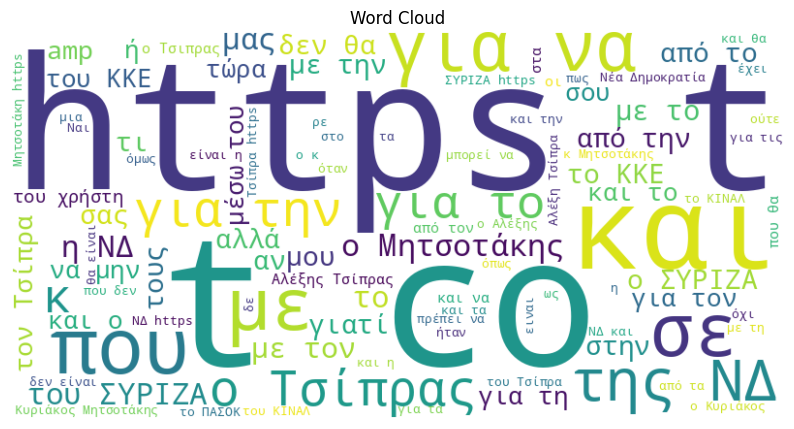

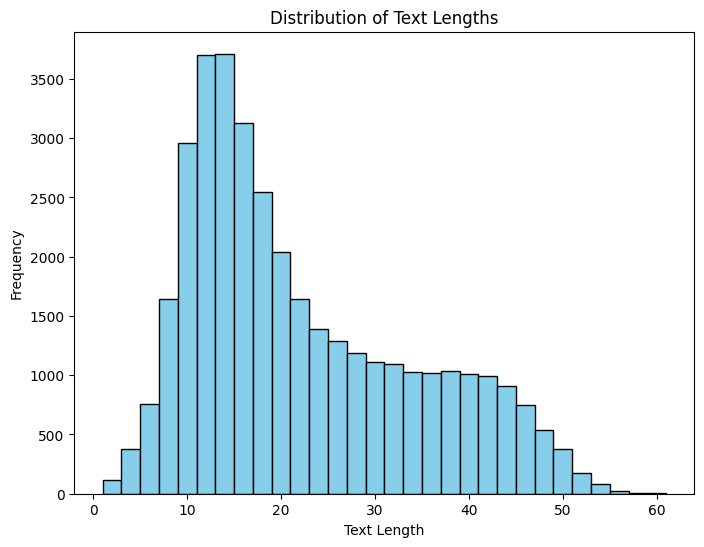

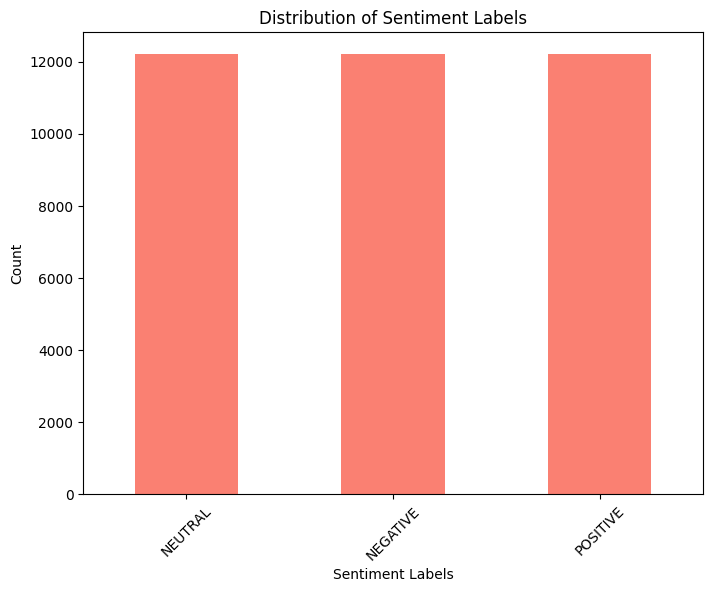

In [2]:
##################### DATA ANALYSIS #######################


###################### Word Cloud #########################
from wordcloud import WordCloud
import matplotlib.pyplot as plt

combined_text = ' '.join(data['Text'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(combined_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show() 

################ TEXT LENGTH HISTOGRAM ################

text_lengths = data['Text'].apply(lambda x: len(x.split())) 

plt.figure(figsize=(8, 6))
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()


######### BAR CHART FOR SENTIMENT #####################
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='salmon')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=45)
plt.show()

In [3]:
pip install greek-stemmer-pos

  Obtaining dependency information for pytest-cov from https://files.pythonhosted.org/packages/a7/4b/8b78d126e275efa2379b1c2e09dc52cf70df16fc3b90613ef82531499d73/pytest_cov-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for coverage[toml]>=5.2.1 from https://files.pythonhosted.org/packages/49/d5/9d66fd984979b58927588efb0398953acbdb4c45eb7cfcd74fa9b8d51d12/coverage-7.4.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.0/234.0 kB 11.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
########## DATA CLEANING ##########3

##################  Libraries  #######################
import re

from unidecode import unidecode

import string
import unicodedata

import spacy

from greek_stemmer import stemmer

pd.set_option('max_colwidth', None)
data.head()

##################  Functions  #######################

#Removing mentions hashtags and links
def remove_mentions_hashtags_links(text):
    return ' '.join(word for word in text.split() if not (word.startswith('@') or word.startswith('#') or word.startswith('https://')))

#Converting capital to lower case letters
def clean_greek_text(text):
    cleaned_text = unidecode(text).lower()
    return cleaned_text

#Removing accends
def remove_accents(text):
    return ''.join(char for char in unicodedata.normalize('NFD', text) if not unicodedata.combining(char))

#Removing stop words
def remove_stopwords(text):
    stopwords = [
        'αλλά', 'αν', 'αντί', 'από', 'αυτά', 'αυτές', 'αυτή', 'αυτό', 'αυτοί', 'αυτός', 
        'αυτούς', 'αυτών', 'για', 'δεν', 'εάν', 'ένα', 'έναν', 'ένας', 'έναντι', 'ένεκα', 
        'έτσι', 'έχει', 'ή', 'ίσως', 'ακόμα', 'αλλά', 'αλλιώς', 'αν', 'αντί', 
        'από', 'αφού', 'αυτά', 'αυτές', 'αυτή', 'αυτό', 'αυτοί', 'αυτός', 'αυτού', 'αυτούς', 
        'αυτών', 'για', 'γιατί', 'γιατί', 'δε', 'δεν', 'δηλαδή', 'εάν', 'είμαι', 
        'είμαστε', 'είναι', 'είσαι', 'είστε', 'εκεί', 'εκτός', 'ένα', 'ένας','έτσι', 'έχει', 'έχεις', 'ή', 'ίσως', 'ήδη', 'ήμαρτον', 'ίσως', 'ίσως', 
        'ήταν', 'ίταν', 'ακόμα', 'ακριβώς', 'αλίμονο', 'αλλά', 'αλλιώς', 'αν', 'ανά', 
        'ανάμεσα', 'ανάμεσα', 'αναμεταξύ', 'αναμεταξύ', 'αντί', 'αντίθετα','από', 'απ', 'από', 'γι', 'για', 'δι', 'δια', 'εις', 'εκ', 'ένα', 'έναν', 'ένας', 'ενός', 
    'εξ', 'επ', 'επί', 'καθ', 'και', 'κατ', 'κατά', 'με', 'μέσα', 'μια', 'μία', 'μιά', 'με', 'ότι',
    'μιαν', 'μιας', 'περί', 'σε', 'στα', 'στη', 'στην', 'στις', 'στο', 'στον', 'στους', 'πιο', 'σου', 'ο', 'η',
    'τα', 'τη', 'την', 'της', 'τις', 'το', 'τον', 'του', 'τους', 'των', 'υπό']

    words = text.split()
    
    cleaned_words = [word for word in words if word not in stopwords]
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

#Removing punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    cleaned_text = text.translate(translator)
    return cleaned_text


#Stemming

def stemming(text):
    words = text.split()
    st_words = [stemmer.stem_word(word,"VBG") for word in words]
    st_text = ' '.join(st_words)
    return st_text
####################  Applications  #######################


data['Text'] = data['Text'].apply(remove_mentions_hashtags_links)
data['Text'] = data['Text'].apply(remove_stopwords)
data['Text'] = data['Text'].apply(remove_accents)
data['Text'] = data['Text'].apply(remove_punctuation)
data['Text'] = data['Text'].apply(stemming)
data['Text'] = data['Text'].str.lower()

print(data['Text'])

0                                                                                               κυριακ κορι απολυμανς καταπολεμης κορι απεντομως κορι
1                                                                                       εξι νε επιστολ μακεδονι «καινε» νδ  μητσοτακ γνωριζ διχας εθν
2                                                                                                              ισχυρ κκε δυναμ λα βουλ καθημεριν αγων
3                                                                                                                                           μνημονιακ
4                                                                                                               αυτ που συγκλονιστικ ψυχασθενει τσιπρ
                                                                             ...                                                                     
36625     κουλ μητσοτακ λε ψεματαδ αδειας κανεν μπαμπ παπαδημητριου μπαμπ προετοιμαζ που ερχετα κουλ

In [5]:
import gensim
import torch

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

############### Experiment ############### merging the two column (Text and Party) into one
#data['New_Text'] = data['Text'] + data['Party']
#data.drop(['Text', 'Party'], axis=1, inplace=True)



#tokenizing text data
tokenized_text = [word_tokenize(sentence.lower()) for sentence in data['Text']]

#converting tokenized text to a format suitable for tfidf-vectorizer
preprocessed_text = [" ".join(tokens) for tokens in tokenized_text]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text) # Got better result with tfidf

################# Experiment ################ testing who vectorizer is better
#count_vectorizer = CountVectorizer()
#count_matrix = count_vectorizer.fit_transform(preprocessed_text)


# converting tfidf matrix to tokenized text for word2vec training
inverse = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()}
tfidf_text = [
    " ".join([inverse[word_id] for word_id in doc.indices]) 
    for doc in tfidf_matrix
]

word2vec_model = Word2Vec(sentences=tfidf_text, vector_size=100, window=5, min_count=1, workers=4)


#getting word2v2ec embeddings for words
word_embeddings = {}
for word in word2vec_model.wv.index_to_key:
    word_embeddings[word] = torch.tensor(word2vec_model.wv[word], dtype=torch.float32)

In [6]:
import torch
from sklearn.model_selection import train_test_split

#text to word embeddings
X = []  #in this list I store embeddings for each tweet
for tweet in tokenized_text:
    tweet_embeddings = [word_embeddings[word] for word in tweet if word in word_embeddings]
    if tweet_embeddings:
        X.append(torch.stack(tweet_embeddings).mean(0)) 
    else:
        X.append(torch.zeros(100))  #no valid embeddings - fill with zeros


#label encoding because sentiment labels are not numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y1 = label_encoder.fit_transform(data['Sentiment']) 

#converting sentiment labels to tensors
Y2 = torch.tensor(Y1, dtype=torch.long)  # Assuming sentiment labels are integers

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y2, test_size=0.2, random_state=42)

In [7]:
#Defining the Bidirectional Stacked RNN Model
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class RNN(nn.Module):
    
    def __init__(self, cell_type, input_size, hidden_size, output_size, num_layers, dropout_prob):
        super(RNN, self).__init__()

        cells = {
          "RNN" : nn.RNN,
          "LSTM"    : nn.LSTM,
          "GRU"     : nn.GRU
        }

        self.cell_type = cell_type

        self.rnn = cells[cell_type](         #picking the specific model
            input_size=input_size,           
            hidden_size=hidden_size,        
            batch_first=True,       #input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
            dropout=dropout_prob
        )
        
        #an linear layer for skip connections
        self.linear_skip = nn.Linear(input_size, hidden_size)

        self.out = nn.Linear(hidden_size, output_size) 

    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)

        if self.cell_type == 'LSTM':
            r_out, (h_n, h_c) = self.rnn(x)
        else:
            r_out, h_n = self.rnn(x)
            
        
        #skip connections
        skip_out = self.linear_skip(x[:, -1, :])
        out = F.relu(r_out[:, -1, :] + skip_out)

        #final linear layer
        out = self.out(out)
        
        return out

In [8]:
#preparing data for training

from torch.utils.data import DataLoader, TensorDataset

#data to PyTorch tensors
X_train_tensor = torch.stack(X_train)
X_test_tensor = torch.stack(X_test)

#create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train)
test_dataset = TensorDataset(X_test_tensor, y_test)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [9]:
input_size = 100
hidden_size = 64
output_size = 3
num_layers = 2
dropout_prob = 0.5 
cell_type = 'LSTM'
net = RNN(cell_type, input_size, hidden_size, output_size, num_layers, dropout_prob)
print(net)

#loss function and optimizer
EPOCH = 1
LR = 0.01

optimizer = torch.optim.Adam(net.parameters(), lr=LR)   # optimize all net parameters
loss_func = nn.CrossEntropyLoss()


RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.5)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1088 | test accuracy: 39.62
Epoch:  0 | train loss: 1.0941 | test accuracy: 38.42
Epoch:  0 | train loss: 1.0965 | test accuracy: 37.72
Epoch:  0 | train loss: 1.1162 | test accuracy: 38.45
Epoch:  0 | train loss: 1.0957 | test accuracy: 37.86
Epoch:  0 | train loss: 1.1075 | test accuracy: 39.59
Epoch:  0 | train loss: 1.1026 | test accuracy: 39.38
Epoch:  0 | train loss: 1.0985 | test accuracy: 38.05
Epoch:  0 | train loss: 1.1099 | test accuracy: 38.22
Epoch:  0 | train loss: 1.0991 | test accuracy: 38.47


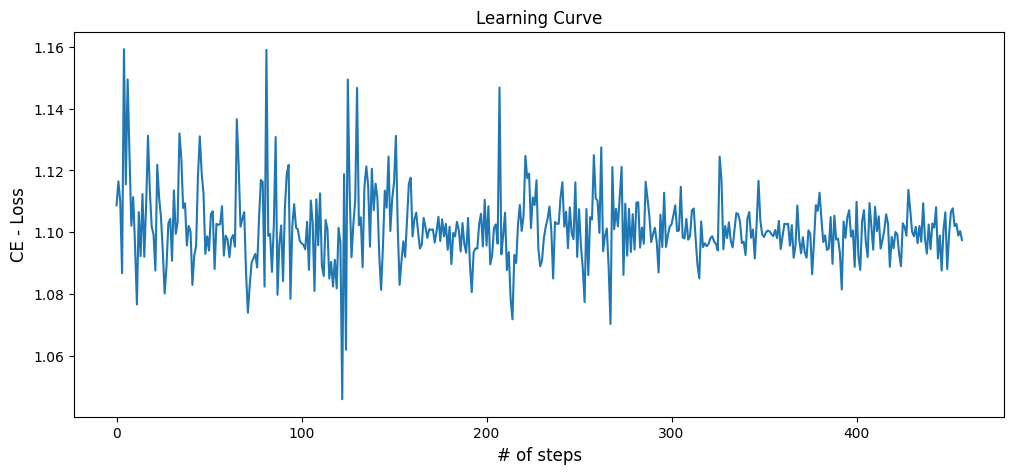

In [10]:
# Training loop

# Start train mode
net.train()

# Accumulate losses
losses = []

# Count the number of batches given to the model
step_count = 0

# Evaluate the progress every # batches
print_every = 50

# Iterate over the whole dataset for one epoch
for epoch in range(EPOCH):

    # Generate batch data
    for step, (x, y) in enumerate(train_loader):

        # clear gradients for this training step
        optimizer.zero_grad()

        # reshape x to (batch, time_step, input_size)
        b_x = x.view(-1, 1, 100)

        # batch y
        b_y = y

        output = net(b_x)
        loss = loss_func(output, b_y)

        # For visualization
        losses.append(loss.item())
        step_count += 1


        # backpropagation - compute gradients
        loss.backward()

        # apply gradients
        optimizer.step()

        # evaluate every N batches
        if step % print_every == 0:

            # Do not calculate gradients
            with torch.no_grad():

                # Faster inference
                net.eval()
                
                
                test_output = net(X_test_tensor.view(-1, 1, 100))

                # Reshaping test_output 
                test_output = test_output.view(-1, output_size)

                # Get predicted class
                pred_y = torch.argmax(test_output, dim=1).squeeze()

                # Calculate accuracy
                accuracy = (pred_y == y_test).sum().item() / float(batch_size)
                print('Epoch: ', epoch, '| train loss: %.4f' % loss.item(), '| test accuracy: %.2f' % accuracy)

            # Return to training mode
            net.train()

# Plot results
plt.figure(figsize=(12,5))
plt.plot(losses)
plt.title('Learning Curve')
plt.xlabel('# of steps', fontsize=12)
plt.ylabel('CE - Loss', fontsize=12)
plt.show()

In [11]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [12]:
import optuna

def objective(trial):

  input_size = 100
  hidden_size =  trial.suggest_categorical('hidden_size', [64, 128])
  output_size = 3
  cell_type = trial.suggest_categorical('cell_type', ['LSTM', 'GRU'])
  num_layers = trial.suggest_int('num_layers', 1, 3) 
  dropout_prob = trial.suggest_float('dropout_prob', 0.0, 0.5)  
    
  net = RNN(cell_type, input_size, hidden_size, output_size, num_layers, dropout_prob)
  print(net)

  EPOCH = 1
  LR = 0.01
  optimizer = torch.optim.Adam(net.parameters(), lr=LR)   # optimize all net parameters
  loss_func = nn.CrossEntropyLoss()

  # Start train mode
  net.train()

  # Accumulate losses
  losses = []

  # Count the number of batches given to the model
  step_count = 0

  # Evaluate the progress every # batches
  print_every = 50

  # Iterate over the whole dataset for one epoch
  for epoch in range(EPOCH):

      # Generate batch data
      for step, (x, y) in enumerate(train_loader):

          # clear gradients for this training step
          optimizer.zero_grad()

          # reshape x to (batch, time_step, input_size)
          b_x = x.view(-1, 1, 100)

          # batch y
          b_y = y


          output = net(b_x)
          loss = loss_func(output, b_y)

          # For visualization
          losses.append(loss.item())
          step_count += 1


          # backpropagation - compute gradients
          loss.backward()

          # apply gradients
          optimizer.step()

          # evaluate every N batches
          if step % print_every == 0:

              # Do not calculate gradients
              with torch.no_grad():

                  # Faster inference
                  net.eval()

                  test_output = net(X_test_tensor.view(-1, 1, 100))
                
                  # Reshaping test_output
                  test_output = test_output.view(-1, output_size)

                  # Get predicted class
                  pred_y = torch.argmax(test_output, dim=1).squeeze()

                  # Calculate accuracy
                  accuracy = (pred_y == y_test).sum().item() / float(batch_size)
                  print('Epoch: ', epoch, '| train loss: %.4f' % loss.item(), '| test accuracy: %.2f' % accuracy)

              # Return to training mode
              net.train()

  return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=55)

[I 2024-02-10 00:39:09,206] A new study created in memory with name: no-name-8445e89d-edd9-4b85-916b-d308cf5e6d24
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.20419895565221474 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.20419895565221474)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1033 | test accuracy: 38.31
Epoch:  0 | train loss: 1.0990 | test accuracy: 38.19
Epoch:  0 | train loss: 1.1234 | test accuracy: 38.81
Epoch:  0 | train loss: 1.1171 | test accuracy: 39.16
Epoch:  0 | train loss: 1.1148 | test accuracy: 39.75
Epoch:  0 | train loss: 1.0920 | test accuracy: 36.94
Epoch:  0 | train loss: 1.0908 | test accuracy: 38.20
Epoch:  0 | train loss: 1.1091 | test accuracy: 37.33
Epoch:  0 | train loss: 1.0917 | test accuracy: 37.50
Epoch:  0 | train loss: 1.1002 | test accuracy: 38.19


[I 2024-02-10 00:39:11,088] Trial 0 finished with value: 38.1875 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 1, 'dropout_prob': 0.20419895565221474}. Best is trial 0 with value: 38.1875.
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3788410604244194 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


RNN(
  (rnn): GRU(100, 64, batch_first=True, dropout=0.3788410604244194)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1076 | test accuracy: 37.75
Epoch:  0 | train loss: 1.0862 | test accuracy: 38.61
Epoch:  0 | train loss: 1.0935 | test accuracy: 39.66
Epoch:  0 | train loss: 1.1237 | test accuracy: 38.50
Epoch:  0 | train loss: 1.0989 | test accuracy: 38.44
Epoch:  0 | train loss: 1.0983 | test accuracy: 38.19
Epoch:  0 | train loss: 1.0993 | test accuracy: 38.41
Epoch:  0 | train loss: 1.0975 | test accuracy: 38.56


[I 2024-02-10 00:39:12,496] Trial 1 finished with value: 38.328125 and parameters: {'hidden_size': 64, 'cell_type': 'GRU', 'num_layers': 1, 'dropout_prob': 0.3788410604244194}. Best is trial 1 with value: 38.328125.


Epoch:  0 | train loss: 1.0964 | test accuracy: 38.16
Epoch:  0 | train loss: 1.0979 | test accuracy: 38.33
RNN(
  (rnn): GRU(100, 64, batch_first=True, dropout=0.12086711035489128)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1050 | test accuracy: 38.03


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12086711035489128 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1052 | test accuracy: 38.98
Epoch:  0 | train loss: 1.0959 | test accuracy: 37.94
Epoch:  0 | train loss: 1.0724 | test accuracy: 37.30
Epoch:  0 | train loss: 1.1054 | test accuracy: 38.89
Epoch:  0 | train loss: 1.0935 | test accuracy: 38.52
Epoch:  0 | train loss: 1.1050 | test accuracy: 38.12
Epoch:  0 | train loss: 1.0975 | test accuracy: 38.30
Epoch:  0 | train loss: 1.0999 | test accuracy: 37.98


[I 2024-02-10 00:39:13,990] Trial 2 finished with value: 39.71875 and parameters: {'hidden_size': 64, 'cell_type': 'GRU', 'num_layers': 1, 'dropout_prob': 0.12086711035489128}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.1159 | test accuracy: 39.72
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.4734979407883405)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1158 | test accuracy: 38.72


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4734979407883405 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1020 | test accuracy: 38.69
Epoch:  0 | train loss: 1.0988 | test accuracy: 39.14
Epoch:  0 | train loss: 1.1003 | test accuracy: 39.67
Epoch:  0 | train loss: 1.0830 | test accuracy: 37.89
Epoch:  0 | train loss: 1.1088 | test accuracy: 38.75
Epoch:  0 | train loss: 1.1172 | test accuracy: 38.56
Epoch:  0 | train loss: 1.1084 | test accuracy: 39.11
Epoch:  0 | train loss: 1.0902 | test accuracy: 38.88


[I 2024-02-10 00:39:15,832] Trial 3 finished with value: 37.609375 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 2, 'dropout_prob': 0.4734979407883405}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.0988 | test accuracy: 37.61
RNN(
  (rnn): GRU(100, 64, batch_first=True, dropout=0.14747856225269146)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1115 | test accuracy: 39.25


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.14747856225269146 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1001 | test accuracy: 38.84
Epoch:  0 | train loss: 1.0993 | test accuracy: 37.06
Epoch:  0 | train loss: 1.1018 | test accuracy: 37.31
Epoch:  0 | train loss: 1.0955 | test accuracy: 38.78
Epoch:  0 | train loss: 1.1028 | test accuracy: 39.28
Epoch:  0 | train loss: 1.0974 | test accuracy: 39.72
Epoch:  0 | train loss: 1.0955 | test accuracy: 38.38
Epoch:  0 | train loss: 1.0956 | test accuracy: 37.88


[I 2024-02-10 00:39:17,311] Trial 4 finished with value: 38.421875 and parameters: {'hidden_size': 64, 'cell_type': 'GRU', 'num_layers': 2, 'dropout_prob': 0.14747856225269146}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.0999 | test accuracy: 38.42
RNN(
  (rnn): GRU(100, 64, batch_first=True, dropout=0.021728583829183967)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0903 | test accuracy: 38.83


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.021728583829183967 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1022 | test accuracy: 38.58
Epoch:  0 | train loss: 1.1008 | test accuracy: 38.98
Epoch:  0 | train loss: 1.1054 | test accuracy: 39.06
Epoch:  0 | train loss: 1.1142 | test accuracy: 38.95
Epoch:  0 | train loss: 1.1015 | test accuracy: 38.33
Epoch:  0 | train loss: 1.0946 | test accuracy: 38.28
Epoch:  0 | train loss: 1.1004 | test accuracy: 38.39
Epoch:  0 | train loss: 1.0991 | test accuracy: 38.64


[I 2024-02-10 00:39:18,832] Trial 5 finished with value: 38.203125 and parameters: {'hidden_size': 64, 'cell_type': 'GRU', 'num_layers': 3, 'dropout_prob': 0.021728583829183967}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.1061 | test accuracy: 38.20
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.04439281893491509)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1025 | test accuracy: 38.55


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.04439281893491509 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0874 | test accuracy: 37.80
Epoch:  0 | train loss: 1.0941 | test accuracy: 38.22
Epoch:  0 | train loss: 1.1069 | test accuracy: 38.48
Epoch:  0 | train loss: 1.0994 | test accuracy: 37.77
Epoch:  0 | train loss: 1.1065 | test accuracy: 39.59
Epoch:  0 | train loss: 1.0990 | test accuracy: 38.64
Epoch:  0 | train loss: 1.1167 | test accuracy: 38.42
Epoch:  0 | train loss: 1.1192 | test accuracy: 38.58


[I 2024-02-10 00:39:20,765] Trial 6 finished with value: 37.34375 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 2, 'dropout_prob': 0.04439281893491509}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.0970 | test accuracy: 37.34
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.4821216997963837)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1072 | test accuracy: 39.45


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4821216997963837 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1205 | test accuracy: 38.20
Epoch:  0 | train loss: 1.1012 | test accuracy: 38.12
Epoch:  0 | train loss: 1.0961 | test accuracy: 38.16
Epoch:  0 | train loss: 1.1023 | test accuracy: 38.69
Epoch:  0 | train loss: 1.1003 | test accuracy: 37.98
Epoch:  0 | train loss: 1.1002 | test accuracy: 38.28
Epoch:  0 | train loss: 1.1011 | test accuracy: 38.72
Epoch:  0 | train loss: 1.1043 | test accuracy: 38.50


[I 2024-02-10 00:39:22,633] Trial 7 finished with value: 39.328125 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.4821216997963837}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.1045 | test accuracy: 39.33
RNN(
  (rnn): GRU(100, 64, batch_first=True, dropout=0.32212253150741565)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1249 | test accuracy: 38.36


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.32212253150741565 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1311 | test accuracy: 39.03
Epoch:  0 | train loss: 1.0824 | test accuracy: 38.41
Epoch:  0 | train loss: 1.0972 | test accuracy: 38.41
Epoch:  0 | train loss: 1.1049 | test accuracy: 39.25
Epoch:  0 | train loss: 1.0990 | test accuracy: 38.88
Epoch:  0 | train loss: 1.0942 | test accuracy: 39.11
Epoch:  0 | train loss: 1.1037 | test accuracy: 37.89
Epoch:  0 | train loss: 1.0938 | test accuracy: 38.67


[I 2024-02-10 00:39:24,518] Trial 8 finished with value: 38.96875 and parameters: {'hidden_size': 64, 'cell_type': 'GRU', 'num_layers': 3, 'dropout_prob': 0.32212253150741565}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.0883 | test accuracy: 38.97
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.10139779771547242)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0985 | test accuracy: 38.31


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.10139779771547242 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1308 | test accuracy: 38.22
Epoch:  0 | train loss: 1.0958 | test accuracy: 37.41
Epoch:  0 | train loss: 1.0896 | test accuracy: 38.30
Epoch:  0 | train loss: 1.1032 | test accuracy: 38.39
Epoch:  0 | train loss: 1.0939 | test accuracy: 38.59
Epoch:  0 | train loss: 1.1427 | test accuracy: 37.84
Epoch:  0 | train loss: 1.1198 | test accuracy: 37.94
Epoch:  0 | train loss: 1.0930 | test accuracy: 39.02


[I 2024-02-10 00:39:26,474] Trial 9 finished with value: 38.390625 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 2, 'dropout_prob': 0.10139779771547242}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.0954 | test accuracy: 38.39
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.24693365393630506)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0942 | test accuracy: 38.00


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.24693365393630506 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1009 | test accuracy: 39.22
Epoch:  0 | train loss: 1.1061 | test accuracy: 38.55
Epoch:  0 | train loss: 1.0852 | test accuracy: 38.45
Epoch:  0 | train loss: 1.1163 | test accuracy: 39.02
Epoch:  0 | train loss: 1.0927 | test accuracy: 37.81
Epoch:  0 | train loss: 1.1007 | test accuracy: 37.88
Epoch:  0 | train loss: 1.1066 | test accuracy: 37.78
Epoch:  0 | train loss: 1.0975 | test accuracy: 38.20


[I 2024-02-10 00:39:28,364] Trial 10 finished with value: 38.40625 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.24693365393630506}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.1004 | test accuracy: 38.41
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.4945283674411005)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1040 | test accuracy: 37.80


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4945283674411005 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1696 | test accuracy: 37.95
Epoch:  0 | train loss: 1.1207 | test accuracy: 38.86
Epoch:  0 | train loss: 1.0969 | test accuracy: 38.20
Epoch:  0 | train loss: 1.0993 | test accuracy: 37.97
Epoch:  0 | train loss: 1.0894 | test accuracy: 39.61
Epoch:  0 | train loss: 1.1166 | test accuracy: 38.23
Epoch:  0 | train loss: 1.0943 | test accuracy: 38.17
Epoch:  0 | train loss: 1.1085 | test accuracy: 37.83


[I 2024-02-10 00:39:30,263] Trial 11 finished with value: 37.46875 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.4945283674411005}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.0963 | test accuracy: 37.47
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.3817240161672625)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0852 | test accuracy: 37.91


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3817240161672625 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1015 | test accuracy: 38.86
Epoch:  0 | train loss: 1.1089 | test accuracy: 37.80
Epoch:  0 | train loss: 1.0951 | test accuracy: 39.12
Epoch:  0 | train loss: 1.0906 | test accuracy: 38.02
Epoch:  0 | train loss: 1.1034 | test accuracy: 38.44
Epoch:  0 | train loss: 1.1137 | test accuracy: 39.12
Epoch:  0 | train loss: 1.1001 | test accuracy: 38.72
Epoch:  0 | train loss: 1.0935 | test accuracy: 38.06


[I 2024-02-10 00:39:32,338] Trial 12 finished with value: 38.546875 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.3817240161672625}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.1035 | test accuracy: 38.55
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.1486396562670408)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1041 | test accuracy: 37.34


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1486396562670408 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0852 | test accuracy: 37.34
Epoch:  0 | train loss: 1.1102 | test accuracy: 38.22
Epoch:  0 | train loss: 1.1111 | test accuracy: 39.06
Epoch:  0 | train loss: 1.1027 | test accuracy: 38.33
Epoch:  0 | train loss: 1.0950 | test accuracy: 39.17
Epoch:  0 | train loss: 1.1043 | test accuracy: 38.92
Epoch:  0 | train loss: 1.1020 | test accuracy: 38.19
Epoch:  0 | train loss: 1.1002 | test accuracy: 39.22


[I 2024-02-10 00:39:34,428] Trial 13 finished with value: 38.234375 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.1486396562670408}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.1001 | test accuracy: 38.23
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.3012473405747971)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1088 | test accuracy: 36.97


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3012473405747971 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0972 | test accuracy: 39.25
Epoch:  0 | train loss: 1.0982 | test accuracy: 38.03
Epoch:  0 | train loss: 1.0778 | test accuracy: 38.58
Epoch:  0 | train loss: 1.0960 | test accuracy: 38.84
Epoch:  0 | train loss: 1.1071 | test accuracy: 38.05
Epoch:  0 | train loss: 1.1022 | test accuracy: 38.69
Epoch:  0 | train loss: 1.1018 | test accuracy: 38.86
Epoch:  0 | train loss: 1.0975 | test accuracy: 38.17


[I 2024-02-10 00:39:36,364] Trial 14 finished with value: 37.90625 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.3012473405747971}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.0969 | test accuracy: 37.91
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.20025589284837914)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0944 | test accuracy: 37.17


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.20025589284837914 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0940 | test accuracy: 39.70
Epoch:  0 | train loss: 1.0934 | test accuracy: 38.47
Epoch:  0 | train loss: 1.1006 | test accuracy: 38.08
Epoch:  0 | train loss: 1.0936 | test accuracy: 37.88
Epoch:  0 | train loss: 1.1059 | test accuracy: 38.53
Epoch:  0 | train loss: 1.0994 | test accuracy: 39.36
Epoch:  0 | train loss: 1.0874 | test accuracy: 39.23
Epoch:  0 | train loss: 1.1130 | test accuracy: 38.00


[I 2024-02-10 00:39:38,248] Trial 15 finished with value: 38.359375 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 2, 'dropout_prob': 0.20025589284837914}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.1041 | test accuracy: 38.36
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.4106295706223225)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1031 | test accuracy: 38.20


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4106295706223225 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1336 | test accuracy: 38.95
Epoch:  0 | train loss: 1.1082 | test accuracy: 38.95
Epoch:  0 | train loss: 1.0882 | test accuracy: 39.02
Epoch:  0 | train loss: 1.0930 | test accuracy: 38.47
Epoch:  0 | train loss: 1.1077 | test accuracy: 38.44
Epoch:  0 | train loss: 1.0983 | test accuracy: 39.34
Epoch:  0 | train loss: 1.1015 | test accuracy: 38.20
Epoch:  0 | train loss: 1.1005 | test accuracy: 39.80


[I 2024-02-10 00:39:40,159] Trial 16 finished with value: 37.6875 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.4106295706223225}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.1070 | test accuracy: 37.69
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.0872082146080872)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1058 | test accuracy: 38.41


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.0872082146080872 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1097 | test accuracy: 39.22
Epoch:  0 | train loss: 1.1112 | test accuracy: 39.14
Epoch:  0 | train loss: 1.1031 | test accuracy: 38.33
Epoch:  0 | train loss: 1.1112 | test accuracy: 38.78
Epoch:  0 | train loss: 1.0980 | test accuracy: 37.75
Epoch:  0 | train loss: 1.0972 | test accuracy: 38.75
Epoch:  0 | train loss: 1.1023 | test accuracy: 38.25
Epoch:  0 | train loss: 1.1072 | test accuracy: 38.59


[I 2024-02-10 00:39:41,992] Trial 17 finished with value: 37.609375 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 3, 'dropout_prob': 0.0872082146080872}. Best is trial 2 with value: 39.71875.


Epoch:  0 | train loss: 1.1006 | test accuracy: 37.61
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.30371171392165125)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0834 | test accuracy: 38.33


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.30371171392165125 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1003 | test accuracy: 38.70
Epoch:  0 | train loss: 1.1161 | test accuracy: 38.03
Epoch:  0 | train loss: 1.1006 | test accuracy: 38.94
Epoch:  0 | train loss: 1.0966 | test accuracy: 38.16
Epoch:  0 | train loss: 1.0925 | test accuracy: 38.28
Epoch:  0 | train loss: 1.1061 | test accuracy: 39.44
Epoch:  0 | train loss: 1.0996 | test accuracy: 38.77
Epoch:  0 | train loss: 1.0881 | test accuracy: 37.89


[I 2024-02-10 00:39:44,700] Trial 18 finished with value: 39.8125 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.30371171392165125}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1026 | test accuracy: 39.81
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.2907348741993336)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0960 | test accuracy: 38.23


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2907348741993336 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1555 | test accuracy: 37.61
Epoch:  0 | train loss: 1.1003 | test accuracy: 38.39
Epoch:  0 | train loss: 1.1099 | test accuracy: 38.66
Epoch:  0 | train loss: 1.1010 | test accuracy: 38.45
Epoch:  0 | train loss: 1.0939 | test accuracy: 38.25
Epoch:  0 | train loss: 1.0986 | test accuracy: 37.92
Epoch:  0 | train loss: 1.0977 | test accuracy: 38.09
Epoch:  0 | train loss: 1.1021 | test accuracy: 38.81


[I 2024-02-10 00:39:46,826] Trial 19 finished with value: 39.25 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 2, 'dropout_prob': 0.2907348741993336}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1074 | test accuracy: 39.25
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.23742470392094425)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1050 | test accuracy: 38.53


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.23742470392094425 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1475 | test accuracy: 38.70
Epoch:  0 | train loss: 1.1143 | test accuracy: 39.47
Epoch:  0 | train loss: 1.0915 | test accuracy: 38.05
Epoch:  0 | train loss: 1.1401 | test accuracy: 38.91
Epoch:  0 | train loss: 1.0825 | test accuracy: 37.25
Epoch:  0 | train loss: 1.1190 | test accuracy: 38.19
Epoch:  0 | train loss: 1.1028 | test accuracy: 38.02
Epoch:  0 | train loss: 1.1014 | test accuracy: 38.73


[I 2024-02-10 00:39:49,639] Trial 20 finished with value: 39.015625 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.23742470392094425}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1003 | test accuracy: 39.02
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.41609873060261193)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0984 | test accuracy: 38.66


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.41609873060261193 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0835 | test accuracy: 38.28
Epoch:  0 | train loss: 1.0989 | test accuracy: 38.50
Epoch:  0 | train loss: 1.1010 | test accuracy: 38.80
Epoch:  0 | train loss: 1.1023 | test accuracy: 38.09
Epoch:  0 | train loss: 1.0926 | test accuracy: 39.09
Epoch:  0 | train loss: 1.0870 | test accuracy: 38.55
Epoch:  0 | train loss: 1.0999 | test accuracy: 38.00
Epoch:  0 | train loss: 1.1107 | test accuracy: 38.78


[I 2024-02-10 00:39:52,464] Trial 21 finished with value: 37.78125 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.41609873060261193}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1137 | test accuracy: 37.78
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.3390848242994209)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0936 | test accuracy: 38.55


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3390848242994209 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1197 | test accuracy: 38.14
Epoch:  0 | train loss: 1.1095 | test accuracy: 38.91
Epoch:  0 | train loss: 1.1040 | test accuracy: 39.28
Epoch:  0 | train loss: 1.1032 | test accuracy: 38.56
Epoch:  0 | train loss: 1.0914 | test accuracy: 38.14
Epoch:  0 | train loss: 1.1328 | test accuracy: 37.97
Epoch:  0 | train loss: 1.1017 | test accuracy: 39.02
Epoch:  0 | train loss: 1.1026 | test accuracy: 39.16


[I 2024-02-10 00:39:55,408] Trial 22 finished with value: 38.390625 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.3390848242994209}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0982 | test accuracy: 38.39
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.4493890265275309)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0885 | test accuracy: 37.95


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4493890265275309 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1073 | test accuracy: 37.67
Epoch:  0 | train loss: 1.0924 | test accuracy: 37.41
Epoch:  0 | train loss: 1.1054 | test accuracy: 39.58
Epoch:  0 | train loss: 1.0871 | test accuracy: 37.38
Epoch:  0 | train loss: 1.0953 | test accuracy: 37.84
Epoch:  0 | train loss: 1.1020 | test accuracy: 38.67
Epoch:  0 | train loss: 1.1065 | test accuracy: 38.36
Epoch:  0 | train loss: 1.0996 | test accuracy: 38.98


[I 2024-02-10 00:39:58,418] Trial 23 finished with value: 39.65625 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.4493890265275309}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1109 | test accuracy: 39.66
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.44549113800884593)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0985 | test accuracy: 38.08


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.44549113800884593 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0997 | test accuracy: 38.28
Epoch:  0 | train loss: 1.0856 | test accuracy: 38.92
Epoch:  0 | train loss: 1.1044 | test accuracy: 38.64
Epoch:  0 | train loss: 1.0964 | test accuracy: 38.03
Epoch:  0 | train loss: 1.0927 | test accuracy: 37.92
Epoch:  0 | train loss: 1.0869 | test accuracy: 37.75
Epoch:  0 | train loss: 1.0966 | test accuracy: 38.33
Epoch:  0 | train loss: 1.1056 | test accuracy: 38.70


[I 2024-02-10 00:40:01,295] Trial 24 finished with value: 38.890625 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.44549113800884593}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1021 | test accuracy: 38.89
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.15730832267201128)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1090 | test accuracy: 39.02


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.15730832267201128 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1059 | test accuracy: 39.22
Epoch:  0 | train loss: 1.1210 | test accuracy: 39.84
Epoch:  0 | train loss: 1.0991 | test accuracy: 39.09
Epoch:  0 | train loss: 1.0930 | test accuracy: 38.56
Epoch:  0 | train loss: 1.1174 | test accuracy: 39.33
Epoch:  0 | train loss: 1.0936 | test accuracy: 37.31
Epoch:  0 | train loss: 1.1004 | test accuracy: 38.78
Epoch:  0 | train loss: 1.0985 | test accuracy: 39.77


[I 2024-02-10 00:40:04,240] Trial 25 finished with value: 38.390625 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 2, 'dropout_prob': 0.15730832267201128}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1028 | test accuracy: 38.39
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.3482384611717976)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0938 | test accuracy: 38.03


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3482384611717976 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0861 | test accuracy: 38.38
Epoch:  0 | train loss: 1.0891 | test accuracy: 38.62
Epoch:  0 | train loss: 1.1017 | test accuracy: 38.94
Epoch:  0 | train loss: 1.0996 | test accuracy: 38.69
Epoch:  0 | train loss: 1.1161 | test accuracy: 38.84
Epoch:  0 | train loss: 1.0890 | test accuracy: 38.62
Epoch:  0 | train loss: 1.1078 | test accuracy: 38.92
Epoch:  0 | train loss: 1.1100 | test accuracy: 38.08


[I 2024-02-10 00:40:06,369] Trial 26 finished with value: 37.75 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 1, 'dropout_prob': 0.3482384611717976}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0799 | test accuracy: 37.75
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.08389731359883186)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0904 | test accuracy: 38.11


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.08389731359883186 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1246 | test accuracy: 37.38
Epoch:  0 | train loss: 1.0934 | test accuracy: 39.62
Epoch:  0 | train loss: 1.1764 | test accuracy: 38.72
Epoch:  0 | train loss: 1.0951 | test accuracy: 37.36
Epoch:  0 | train loss: 1.0934 | test accuracy: 38.52
Epoch:  0 | train loss: 1.1090 | test accuracy: 39.19
Epoch:  0 | train loss: 1.0982 | test accuracy: 38.94
Epoch:  0 | train loss: 1.1051 | test accuracy: 38.41


[I 2024-02-10 00:40:09,052] Trial 27 finished with value: 38.65625 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.08389731359883186}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1031 | test accuracy: 38.66
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.2616791158928247)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1032 | test accuracy: 37.06


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2616791158928247 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1074 | test accuracy: 38.92
Epoch:  0 | train loss: 1.1095 | test accuracy: 39.36
Epoch:  0 | train loss: 1.0996 | test accuracy: 38.95
Epoch:  0 | train loss: 1.1069 | test accuracy: 38.94
Epoch:  0 | train loss: 1.0951 | test accuracy: 38.33
Epoch:  0 | train loss: 1.1007 | test accuracy: 38.58
Epoch:  0 | train loss: 1.1084 | test accuracy: 38.23
Epoch:  0 | train loss: 1.0977 | test accuracy: 38.56


[I 2024-02-10 00:40:11,007] Trial 28 finished with value: 37.96875 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 2, 'dropout_prob': 0.2616791158928247}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1616 | test accuracy: 37.97
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.19059016905004278)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0915 | test accuracy: 38.03


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.19059016905004278 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0956 | test accuracy: 37.92
Epoch:  0 | train loss: 1.1142 | test accuracy: 39.25
Epoch:  0 | train loss: 1.1011 | test accuracy: 38.27
Epoch:  0 | train loss: 1.0906 | test accuracy: 38.08
Epoch:  0 | train loss: 1.1055 | test accuracy: 38.72
Epoch:  0 | train loss: 1.0926 | test accuracy: 38.19
Epoch:  0 | train loss: 1.0874 | test accuracy: 38.50
Epoch:  0 | train loss: 1.1215 | test accuracy: 38.86


[I 2024-02-10 00:40:12,896] Trial 29 finished with value: 38.546875 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 1, 'dropout_prob': 0.19059016905004278}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0865 | test accuracy: 38.55
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=3.810966286005302e-05)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1006 | test accuracy: 39.16


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=3.810966286005302e-05 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0933 | test accuracy: 38.73
Epoch:  0 | train loss: 1.1157 | test accuracy: 38.45
Epoch:  0 | train loss: 1.0957 | test accuracy: 38.55
Epoch:  0 | train loss: 1.0928 | test accuracy: 39.06
Epoch:  0 | train loss: 1.1183 | test accuracy: 38.88
Epoch:  0 | train loss: 1.1016 | test accuracy: 38.67
Epoch:  0 | train loss: 1.1042 | test accuracy: 38.91
Epoch:  0 | train loss: 1.1067 | test accuracy: 38.36


[I 2024-02-10 00:40:15,752] Trial 30 finished with value: 38.71875 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 3.810966286005302e-05}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0984 | test accuracy: 38.72
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.449963915903324)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1241 | test accuracy: 37.95


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.449963915903324 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1335 | test accuracy: 38.38
Epoch:  0 | train loss: 1.0999 | test accuracy: 39.06
Epoch:  0 | train loss: 1.1034 | test accuracy: 39.48
Epoch:  0 | train loss: 1.1404 | test accuracy: 38.19
Epoch:  0 | train loss: 1.0991 | test accuracy: 39.59
Epoch:  0 | train loss: 1.1004 | test accuracy: 38.75
Epoch:  0 | train loss: 1.0941 | test accuracy: 38.52
Epoch:  0 | train loss: 1.1044 | test accuracy: 38.00


[I 2024-02-10 00:40:17,843] Trial 31 finished with value: 38.453125 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.449963915903324}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1070 | test accuracy: 38.45
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.49618257825530837)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0969 | test accuracy: 38.39


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.49618257825530837 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1264 | test accuracy: 39.19
Epoch:  0 | train loss: 1.0994 | test accuracy: 38.89
Epoch:  0 | train loss: 1.0950 | test accuracy: 39.52
Epoch:  0 | train loss: 1.1132 | test accuracy: 38.02
Epoch:  0 | train loss: 1.1054 | test accuracy: 38.25
Epoch:  0 | train loss: 1.0941 | test accuracy: 39.23
Epoch:  0 | train loss: 1.1011 | test accuracy: 38.42
Epoch:  0 | train loss: 1.1022 | test accuracy: 38.20


[I 2024-02-10 00:40:19,951] Trial 32 finished with value: 38.234375 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.49618257825530837}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1056 | test accuracy: 38.23
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.37943734392035794)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0934 | test accuracy: 38.02


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.37943734392035794 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1203 | test accuracy: 38.77
Epoch:  0 | train loss: 1.0897 | test accuracy: 37.80
Epoch:  0 | train loss: 1.0984 | test accuracy: 38.36
Epoch:  0 | train loss: 1.0855 | test accuracy: 38.08
Epoch:  0 | train loss: 1.1096 | test accuracy: 38.53
Epoch:  0 | train loss: 1.0959 | test accuracy: 38.81
Epoch:  0 | train loss: 1.0986 | test accuracy: 37.53
Epoch:  0 | train loss: 1.1086 | test accuracy: 39.39


[I 2024-02-10 00:40:22,066] Trial 33 finished with value: 38.21875 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.37943734392035794}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0909 | test accuracy: 38.22
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.4433266264506378)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0980 | test accuracy: 38.42


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4433266264506378 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1131 | test accuracy: 39.19
Epoch:  0 | train loss: 1.0898 | test accuracy: 39.08
Epoch:  0 | train loss: 1.0916 | test accuracy: 38.03
Epoch:  0 | train loss: 1.0861 | test accuracy: 39.12
Epoch:  0 | train loss: 1.1091 | test accuracy: 38.00
Epoch:  0 | train loss: 1.1046 | test accuracy: 37.48
Epoch:  0 | train loss: 1.0997 | test accuracy: 38.02
Epoch:  0 | train loss: 1.0992 | test accuracy: 38.17


[I 2024-02-10 00:40:24,971] Trial 34 finished with value: 38.46875 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.4433266264506378}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0826 | test accuracy: 38.47
RNN(
  (rnn): GRU(100, 64, batch_first=True, dropout=0.47174079820833925)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0974 | test accuracy: 38.23


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.47174079820833925 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0909 | test accuracy: 38.92
Epoch:  0 | train loss: 1.0967 | test accuracy: 39.55
Epoch:  0 | train loss: 1.1015 | test accuracy: 38.38
Epoch:  0 | train loss: 1.1030 | test accuracy: 37.22
Epoch:  0 | train loss: 1.0926 | test accuracy: 37.77
Epoch:  0 | train loss: 1.1012 | test accuracy: 38.67
Epoch:  0 | train loss: 1.1028 | test accuracy: 37.33
Epoch:  0 | train loss: 1.1232 | test accuracy: 38.00


[I 2024-02-10 00:40:26,789] Trial 35 finished with value: 38.78125 and parameters: {'hidden_size': 64, 'cell_type': 'GRU', 'num_layers': 2, 'dropout_prob': 0.47174079820833925}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0990 | test accuracy: 38.78
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.39276496893368507)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1156 | test accuracy: 36.80


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.39276496893368507 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1057 | test accuracy: 38.44
Epoch:  0 | train loss: 1.0926 | test accuracy: 38.72
Epoch:  0 | train loss: 1.1141 | test accuracy: 37.64
Epoch:  0 | train loss: 1.1126 | test accuracy: 37.84
Epoch:  0 | train loss: 1.0996 | test accuracy: 38.86
Epoch:  0 | train loss: 1.1098 | test accuracy: 39.66
Epoch:  0 | train loss: 1.0973 | test accuracy: 39.91
Epoch:  0 | train loss: 1.1033 | test accuracy: 38.58


[I 2024-02-10 00:40:29,228] Trial 36 finished with value: 37.3125 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 1, 'dropout_prob': 0.39276496893368507}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0984 | test accuracy: 37.31
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.11672363282631687)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1157 | test accuracy: 39.00


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.11672363282631687 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0974 | test accuracy: 39.09
Epoch:  0 | train loss: 1.1184 | test accuracy: 38.69
Epoch:  0 | train loss: 1.0932 | test accuracy: 38.77
Epoch:  0 | train loss: 1.1068 | test accuracy: 38.33
Epoch:  0 | train loss: 1.0951 | test accuracy: 39.08
Epoch:  0 | train loss: 1.0917 | test accuracy: 38.47
Epoch:  0 | train loss: 1.1002 | test accuracy: 37.98
Epoch:  0 | train loss: 1.1015 | test accuracy: 37.94


[I 2024-02-10 00:40:31,413] Trial 37 finished with value: 37.890625 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.11672363282631687}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0969 | test accuracy: 37.89
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.35315739379096095)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0972 | test accuracy: 38.42


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.35315739379096095 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1016 | test accuracy: 38.67
Epoch:  0 | train loss: 1.0901 | test accuracy: 39.36
Epoch:  0 | train loss: 1.0977 | test accuracy: 39.23
Epoch:  0 | train loss: 1.0994 | test accuracy: 38.75
Epoch:  0 | train loss: 1.0999 | test accuracy: 38.77
Epoch:  0 | train loss: 1.0948 | test accuracy: 38.56
Epoch:  0 | train loss: 1.0958 | test accuracy: 37.28
Epoch:  0 | train loss: 1.1085 | test accuracy: 38.03


[I 2024-02-10 00:40:33,655] Trial 38 finished with value: 37.9375 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 2, 'dropout_prob': 0.35315739379096095}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0940 | test accuracy: 37.94
RNN(
  (rnn): GRU(100, 64, batch_first=True, dropout=0.04745395979371529)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0950 | test accuracy: 37.16


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.04745395979371529 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1062 | test accuracy: 39.11
Epoch:  0 | train loss: 1.1128 | test accuracy: 38.64
Epoch:  0 | train loss: 1.1216 | test accuracy: 39.31
Epoch:  0 | train loss: 1.1106 | test accuracy: 38.06
Epoch:  0 | train loss: 1.1076 | test accuracy: 38.47
Epoch:  0 | train loss: 1.0954 | test accuracy: 38.53
Epoch:  0 | train loss: 1.1079 | test accuracy: 38.14
Epoch:  0 | train loss: 1.0962 | test accuracy: 37.59


[I 2024-02-10 00:40:35,325] Trial 39 finished with value: 38.359375 and parameters: {'hidden_size': 64, 'cell_type': 'GRU', 'num_layers': 3, 'dropout_prob': 0.04745395979371529}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1050 | test accuracy: 38.36
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.4227241325557666)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1043 | test accuracy: 37.16


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4227241325557666 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1099 | test accuracy: 38.06
Epoch:  0 | train loss: 1.0904 | test accuracy: 39.22
Epoch:  0 | train loss: 1.1051 | test accuracy: 38.75
Epoch:  0 | train loss: 1.1191 | test accuracy: 37.83
Epoch:  0 | train loss: 1.0962 | test accuracy: 38.73
Epoch:  0 | train loss: 1.1030 | test accuracy: 39.08
Epoch:  0 | train loss: 1.1054 | test accuracy: 38.03
Epoch:  0 | train loss: 1.1188 | test accuracy: 38.89
Epoch:  0 | train loss: 1.1105 | test accuracy: 38.27


[I 2024-02-10 00:40:37,199] Trial 40 finished with value: 38.265625 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 2, 'dropout_prob': 0.4227241325557666}. Best is trial 18 with value: 39.8125.
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2894988407648328 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.2894988407648328)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1091 | test accuracy: 38.36
Epoch:  0 | train loss: 1.1003 | test accuracy: 38.72
Epoch:  0 | train loss: 1.0932 | test accuracy: 39.23
Epoch:  0 | train loss: 1.0991 | test accuracy: 38.30
Epoch:  0 | train loss: 1.0954 | test accuracy: 38.23
Epoch:  0 | train loss: 1.1005 | test accuracy: 38.25
Epoch:  0 | train loss: 1.1011 | test accuracy: 39.27
Epoch:  0 | train loss: 1.1018 | test accuracy: 39.64
Epoch:  0 | train loss: 1.1161 | test accuracy: 38.52


[I 2024-02-10 00:40:39,157] Trial 41 finished with value: 38.984375 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 2, 'dropout_prob': 0.2894988407648328}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1008 | test accuracy: 38.98
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.28560498303535553)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0984 | test accuracy: 37.05


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.28560498303535553 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0918 | test accuracy: 38.00
Epoch:  0 | train loss: 1.0901 | test accuracy: 39.16
Epoch:  0 | train loss: 1.1139 | test accuracy: 38.56
Epoch:  0 | train loss: 1.0894 | test accuracy: 38.31
Epoch:  0 | train loss: 1.0984 | test accuracy: 37.08
Epoch:  0 | train loss: 1.1000 | test accuracy: 38.78
Epoch:  0 | train loss: 1.1062 | test accuracy: 37.77
Epoch:  0 | train loss: 1.0856 | test accuracy: 37.95


[I 2024-02-10 00:40:41,009] Trial 42 finished with value: 37.9375 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 3, 'dropout_prob': 0.28560498303535553}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0965 | test accuracy: 37.94
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.22798504554826549)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0957 | test accuracy: 38.34


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.22798504554826549 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1309 | test accuracy: 38.45
Epoch:  0 | train loss: 1.0971 | test accuracy: 38.48
Epoch:  0 | train loss: 1.0739 | test accuracy: 38.84
Epoch:  0 | train loss: 1.1215 | test accuracy: 38.20
Epoch:  0 | train loss: 1.0899 | test accuracy: 37.88
Epoch:  0 | train loss: 1.0952 | test accuracy: 39.30
Epoch:  0 | train loss: 1.1251 | test accuracy: 37.69
Epoch:  0 | train loss: 1.1109 | test accuracy: 38.75


[I 2024-02-10 00:40:42,875] Trial 43 finished with value: 37.578125 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 1, 'dropout_prob': 0.22798504554826549}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1662 | test accuracy: 37.58
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.17717193862120664)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0978 | test accuracy: 38.39


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.17717193862120664 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0760 | test accuracy: 37.23
Epoch:  0 | train loss: 1.1051 | test accuracy: 38.91
Epoch:  0 | train loss: 1.0970 | test accuracy: 38.80
Epoch:  0 | train loss: 1.1258 | test accuracy: 38.84
Epoch:  0 | train loss: 1.1208 | test accuracy: 38.38
Epoch:  0 | train loss: 1.1389 | test accuracy: 38.31
Epoch:  0 | train loss: 1.1135 | test accuracy: 38.39
Epoch:  0 | train loss: 1.0963 | test accuracy: 38.53


[I 2024-02-10 00:40:44,824] Trial 44 finished with value: 38.1875 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 2, 'dropout_prob': 0.17717193862120664}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1102 | test accuracy: 38.19
RNN(
  (rnn): GRU(100, 128, batch_first=True, dropout=0.310147609859781)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0830 | test accuracy: 38.33


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.310147609859781 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1074 | test accuracy: 37.50
Epoch:  0 | train loss: 1.1059 | test accuracy: 38.06
Epoch:  0 | train loss: 1.0893 | test accuracy: 38.31
Epoch:  0 | train loss: 1.1018 | test accuracy: 38.50
Epoch:  0 | train loss: 1.1341 | test accuracy: 40.11
Epoch:  0 | train loss: 1.0944 | test accuracy: 38.14
Epoch:  0 | train loss: 1.1104 | test accuracy: 39.66
Epoch:  0 | train loss: 1.0856 | test accuracy: 37.69
Epoch:  0 | train loss: 1.1048 | test accuracy: 38.12


[I 2024-02-10 00:40:46,747] Trial 45 finished with value: 38.125 and parameters: {'hidden_size': 128, 'cell_type': 'GRU', 'num_layers': 1, 'dropout_prob': 0.310147609859781}. Best is trial 18 with value: 39.8125.
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2770410741912379 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


RNN(
  (rnn): GRU(100, 64, batch_first=True, dropout=0.2770410741912379)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1261 | test accuracy: 37.75
Epoch:  0 | train loss: 1.0937 | test accuracy: 38.83
Epoch:  0 | train loss: 1.1130 | test accuracy: 38.69
Epoch:  0 | train loss: 1.1097 | test accuracy: 38.23
Epoch:  0 | train loss: 1.0972 | test accuracy: 38.05
Epoch:  0 | train loss: 1.1032 | test accuracy: 38.23
Epoch:  0 | train loss: 1.1024 | test accuracy: 37.53
Epoch:  0 | train loss: 1.0967 | test accuracy: 39.28


[I 2024-02-10 00:40:48,252] Trial 46 finished with value: 38.5 and parameters: {'hidden_size': 64, 'cell_type': 'GRU', 'num_layers': 1, 'dropout_prob': 0.2770410741912379}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0898 | test accuracy: 38.16
Epoch:  0 | train loss: 1.0966 | test accuracy: 38.50


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.32557425355210984 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.32557425355210984)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0989 | test accuracy: 38.23
Epoch:  0 | train loss: 1.0992 | test accuracy: 38.14
Epoch:  0 | train loss: 1.1085 | test accuracy: 39.58
Epoch:  0 | train loss: 1.0951 | test accuracy: 38.45
Epoch:  0 | train loss: 1.1044 | test accuracy: 38.64
Epoch:  0 | train loss: 1.0979 | test accuracy: 37.39
Epoch:  0 | train loss: 1.0978 | test accuracy: 38.53
Epoch:  0 | train loss: 1.0826 | test accuracy: 38.62
Epoch:  0 | train loss: 1.0892 | test accuracy: 39.38


[I 2024-02-10 00:40:50,862] Trial 47 finished with value: 38.515625 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 3, 'dropout_prob': 0.32557425355210984}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0992 | test accuracy: 38.52
RNN(
  (rnn): GRU(100, 64, batch_first=True, dropout=0.47595681842180404)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1120 | test accuracy: 38.77


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.47595681842180404 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0857 | test accuracy: 38.52
Epoch:  0 | train loss: 1.1040 | test accuracy: 39.12
Epoch:  0 | train loss: 1.1115 | test accuracy: 37.58
Epoch:  0 | train loss: 1.1000 | test accuracy: 37.80
Epoch:  0 | train loss: 1.1031 | test accuracy: 38.72
Epoch:  0 | train loss: 1.0778 | test accuracy: 38.69
Epoch:  0 | train loss: 1.1033 | test accuracy: 38.27
Epoch:  0 | train loss: 1.1017 | test accuracy: 38.34


[I 2024-02-10 00:40:52,458] Trial 48 finished with value: 38.6875 and parameters: {'hidden_size': 64, 'cell_type': 'GRU', 'num_layers': 1, 'dropout_prob': 0.47595681842180404}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1201 | test accuracy: 38.69
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.36047040963737415)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0985 | test accuracy: 39.41


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.36047040963737415 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.1124 | test accuracy: 37.58
Epoch:  0 | train loss: 1.0957 | test accuracy: 38.56
Epoch:  0 | train loss: 1.1017 | test accuracy: 38.17
Epoch:  0 | train loss: 1.1063 | test accuracy: 38.06
Epoch:  0 | train loss: 1.1328 | test accuracy: 39.19
Epoch:  0 | train loss: 1.0980 | test accuracy: 38.12
Epoch:  0 | train loss: 1.0992 | test accuracy: 38.91
Epoch:  0 | train loss: 1.0939 | test accuracy: 38.89


[I 2024-02-10 00:40:55,080] Trial 49 finished with value: 38.03125 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 2, 'dropout_prob': 0.36047040963737415}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.1234 | test accuracy: 38.03
RNN(
  (rnn): LSTM(100, 64, batch_first=True, dropout=0.2124397381785632)
  (linear_skip): Linear(in_features=100, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0957 | test accuracy: 37.09


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2124397381785632 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0953 | test accuracy: 38.50
Epoch:  0 | train loss: 1.1086 | test accuracy: 38.73
Epoch:  0 | train loss: 1.1008 | test accuracy: 38.09
Epoch:  0 | train loss: 1.0990 | test accuracy: 38.48
Epoch:  0 | train loss: 1.0970 | test accuracy: 38.86
Epoch:  0 | train loss: 1.1122 | test accuracy: 37.53
Epoch:  0 | train loss: 1.0985 | test accuracy: 38.30
Epoch:  0 | train loss: 1.1006 | test accuracy: 37.81
Epoch:  0 | train loss: 1.1103 | test accuracy: 37.56


[I 2024-02-10 00:40:56,949] Trial 50 finished with value: 37.5625 and parameters: {'hidden_size': 64, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.2124397381785632}. Best is trial 18 with value: 39.8125.
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.24033654199609786 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.24033654199609786)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1056 | test accuracy: 39.19
Epoch:  0 | train loss: 1.0641 | test accuracy: 39.52
Epoch:  0 | train loss: 1.1067 | test accuracy: 37.66
Epoch:  0 | train loss: 1.1074 | test accuracy: 39.22
Epoch:  0 | train loss: 1.1210 | test accuracy: 38.25
Epoch:  0 | train loss: 1.1029 | test accuracy: 39.12
Epoch:  0 | train loss: 1.0976 | test accuracy: 39.27
Epoch:  0 | train loss: 1.1004 | test accuracy: 38.97
Epoch:  0 | train loss: 1.1003 | test accuracy: 37.95


[I 2024-02-10 00:40:59,990] Trial 51 finished with value: 38.046875 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.24033654199609786}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0969 | test accuracy: 38.05
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.12408267377395255)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1077 | test accuracy: 38.58


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.12408267377395255 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0839 | test accuracy: 37.88
Epoch:  0 | train loss: 1.0879 | test accuracy: 38.94
Epoch:  0 | train loss: 1.0905 | test accuracy: 38.98
Epoch:  0 | train loss: 1.1091 | test accuracy: 39.64
Epoch:  0 | train loss: 1.1041 | test accuracy: 38.92
Epoch:  0 | train loss: 1.0977 | test accuracy: 38.00
Epoch:  0 | train loss: 1.0967 | test accuracy: 38.39
Epoch:  0 | train loss: 1.1019 | test accuracy: 38.38


[I 2024-02-10 00:41:02,679] Trial 52 finished with value: 38.015625 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.12408267377395255}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0941 | test accuracy: 38.02
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.2559458614228348)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.1088 | test accuracy: 37.19


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2559458614228348 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0990 | test accuracy: 37.61
Epoch:  0 | train loss: 1.1103 | test accuracy: 37.95
Epoch:  0 | train loss: 1.1348 | test accuracy: 38.72
Epoch:  0 | train loss: 1.0739 | test accuracy: 39.66
Epoch:  0 | train loss: 1.0897 | test accuracy: 38.56
Epoch:  0 | train loss: 1.1114 | test accuracy: 39.05
Epoch:  0 | train loss: 1.1082 | test accuracy: 38.09
Epoch:  0 | train loss: 1.0980 | test accuracy: 38.16


[I 2024-02-10 00:41:05,346] Trial 53 finished with value: 39.03125 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.2559458614228348}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0974 | test accuracy: 39.03
RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.2589541758633379)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)
Epoch:  0 | train loss: 1.0983 | test accuracy: 37.11


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2589541758633379 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch:  0 | train loss: 1.0986 | test accuracy: 38.83
Epoch:  0 | train loss: 1.0994 | test accuracy: 38.38
Epoch:  0 | train loss: 1.0930 | test accuracy: 38.03
Epoch:  0 | train loss: 1.0924 | test accuracy: 39.22
Epoch:  0 | train loss: 1.0946 | test accuracy: 38.27
Epoch:  0 | train loss: 1.0984 | test accuracy: 39.03
Epoch:  0 | train loss: 1.1043 | test accuracy: 38.64
Epoch:  0 | train loss: 1.0920 | test accuracy: 38.89


[I 2024-02-10 00:41:07,962] Trial 54 finished with value: 38.953125 and parameters: {'hidden_size': 128, 'cell_type': 'LSTM', 'num_layers': 1, 'dropout_prob': 0.2589541758633379}. Best is trial 18 with value: 39.8125.


Epoch:  0 | train loss: 1.0992 | test accuracy: 38.95


In [13]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

plot_optimization_history(study)

In [14]:
#after optimization
best_params = study.best_trial.params

#retraining the Autoencoder using the best parameters
best_hidden_size = best_params['hidden_size']
best_dropout_prob = best_params['dropout_prob']
best_cell_type = best_params['cell_type']
best_num_layers = best_params['num_layers']

input_size = 100
output_size = 3

net = RNN(best_cell_type, input_size, best_hidden_size, output_size, best_num_layers, best_dropout_prob)
print(net)

# Loss function and optimizer
EPOCH = 1
LR = 0.01

optimizer = torch.optim.Adam(net.parameters(), lr=LR)   # optimize all net parameters
loss_func = nn.CrossEntropyLoss()

RNN(
  (rnn): LSTM(100, 128, batch_first=True, dropout=0.30371171392165125)
  (linear_skip): Linear(in_features=100, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=3, bias=True)
)


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/rnn.py:71: UserWarning:

dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.30371171392165125 and num_layers=1



Epoch:  0 | train loss: 1.0937 | test accuracy: 38.66
Epoch:  0 | train loss: 1.1102 | test accuracy: 38.05
Epoch:  0 | train loss: 1.0873 | test accuracy: 38.61
Epoch:  0 | train loss: 1.1262 | test accuracy: 39.23
Epoch:  0 | train loss: 1.1053 | test accuracy: 39.52
Epoch:  0 | train loss: 1.1023 | test accuracy: 37.77
Epoch:  0 | train loss: 1.0966 | test accuracy: 37.84
Epoch:  0 | train loss: 1.0979 | test accuracy: 38.98
Epoch:  0 | train loss: 1.1052 | test accuracy: 39.17
Epoch:  0 | train loss: 1.1058 | test accuracy: 38.58
Class 0: Precision = 0.34218743494733334, Recall = 0.3358806702084185, F1 Score = 0.33900472272061705
Class 1: Precision = 0.3372110590723674, Recall = 0.3644081632653061, F1 Score = 0.35028248587570615
Class 2: Precision = 0.33309905556775754, Recall = 0.3121860848085632, F1 Score = 0.32230368717458296


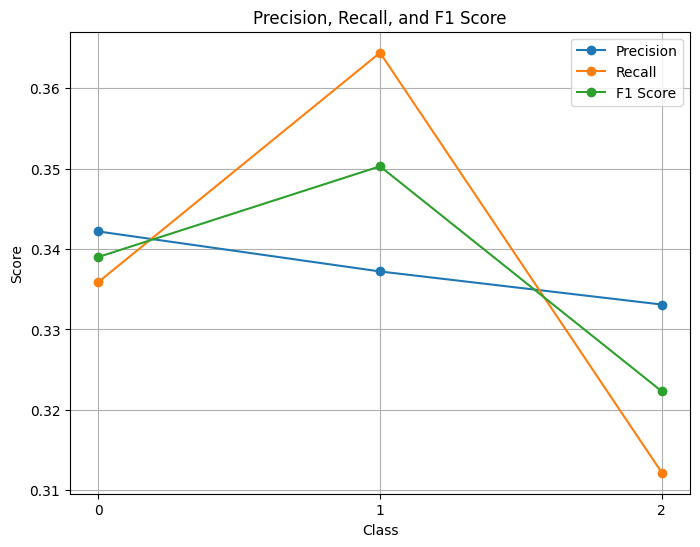

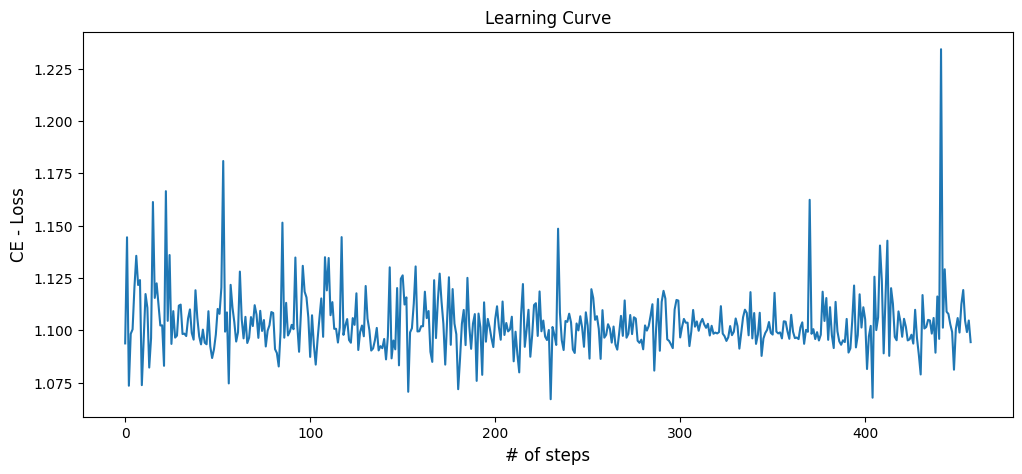

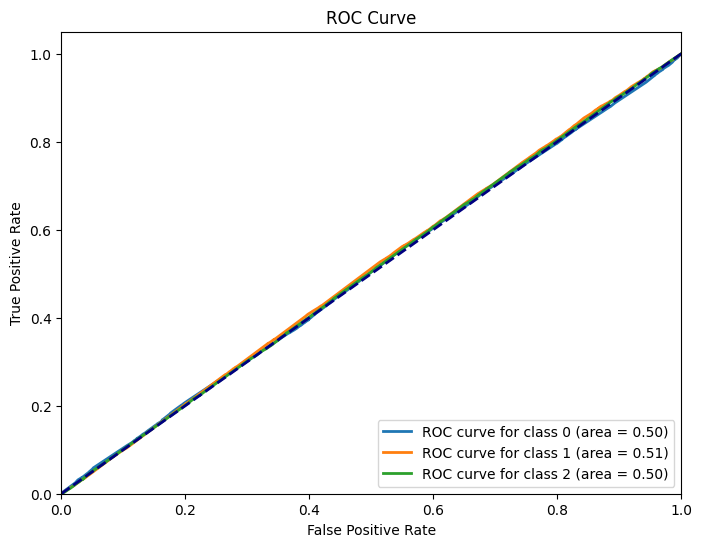

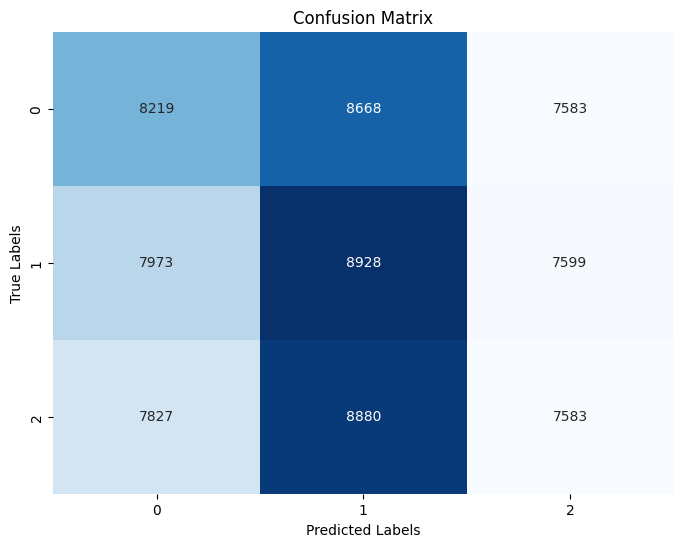

In [15]:
# Training loop after Optimization

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score


# Start train mode
net.train()

# Accumulate losses
losses = []

# Count the number of batches given to the model
step_count = 0

# Evaluate the progress every # batches
print_every = 50

# Gradient clipping threshold
max_grad_norm = 2.0 


precisions = []
recalls = []
f1_scores = []

# Lists to store ROC curve data
all_labels = []
all_probs = []

# Iterate over the whole dataset for one epoch
for epoch in range(EPOCH):
    
    all_probs = []
    # Generate batch data
    for step, (x, y) in enumerate(train_loader):

        # clear gradients for this training step
        optimizer.zero_grad()

        # reshape x to (batch, time_step, input_size)
        b_x = x.view(-1, 1, 100)

        # batch y
        b_y = y

        output = net(b_x)
        loss = loss_func(output, b_y)

        # For visualization
        losses.append(loss.item())
        step_count += 1


        # backpropagation - compute gradients
        loss.backward()
        
         # Gradient clipping
        nn.utils.clip_grad_norm_(net.parameters(), max_grad_norm)
        
        # apply gradients
        optimizer.step()

        # evaluate every N batches
        if step % print_every == 0:

            # Do not calculate gradients
            with torch.no_grad():

                # Faster inference
                net.eval()
                
                
                test_output = net(X_test_tensor.view(-1, 1, 100))

                # eshaping test_output
                test_output = test_output.view(-1, output_size)

                # Get predicted class
                pred_y = torch.argmax(test_output, dim=1).squeeze()

                # Calculate accuracy
                accuracy = (pred_y == y_test).sum().item() / float(batch_size)
                print('Epoch: ', epoch, '| train loss: %.4f' % loss.item(), '| test accuracy: %.2f' % accuracy)
                
                # Store predictions and true labels for ROC curve
                all_labels.extend(y_test.cpu().numpy())
                all_probs.extend(test_output.cpu().numpy())

            # Return to training mode
            net.train()
            
            
            
# Convert labels to one-hot encoding
y_test_one_hot = label_binarize(all_labels, classes=np.arange(output_size))

# Convert lists to arrays
y_test_one_hot = np.array(y_test_one_hot)
all_probs = np.array(all_probs)


for i in range(output_size):
    precision = precision_score(y_test_one_hot[:, i], np.argmax(all_probs, axis=1) == i)
    recall = recall_score(y_test_one_hot[:, i], np.argmax(all_probs, axis=1) == i)
    f1 = f1_score(y_test_one_hot[:, i], np.argmax(all_probs, axis=1) == i)
    
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    print(f"Class {i}: Precision = {precision}, Recall = {recall}, F1 Score = {f1}")

    
# Plot precision, recall, and F-measure for each class
plt.figure(figsize=(8, 6))
plt.plot(range(output_size), precisions, marker='o', label='Precision')
plt.plot(range(output_size), recalls, marker='o', label='Recall')
plt.plot(range(output_size), f1_scores, marker='o', label='F1 Score')
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score')
plt.xticks(range(output_size))
plt.legend()
plt.grid(True)
plt.show()


# Plot Learning Curve
plt.figure(figsize=(12,5))
plt.plot(losses)
plt.title('Learning Curve')
plt.xlabel('# of steps', fontsize=12)
plt.ylabel('CE - Loss', fontsize=12)
plt.show()

# Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(output_size):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], all_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class {} (area = {:0.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(all_labels, np.argmax(all_probs, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
################### Train final model ###################

data_test = pd.read_csv('/kaggle/input/ys19-2023-assignment-3/test_set.csv')
pd.set_option('max_colwidth', None)
data_test.head()

#### preprocessing for test_set data
# applying all the previous steps, the same way as for train_set ###

data_test['Text'] = data_test['Text'].apply(remove_mentions_hashtags_links)
data_test['Text'] = data_test['Text'].apply(remove_stopwords)
data_test['Text'] = data_test['Text'].apply(remove_accents)
data_test['Text'] = data_test['Text'].apply(remove_punctuation)
data_test['Text'] = data_test['Text'].apply(stemming)
data_test['Text'] = data_test['Text'].str.lower()

tokenized_text = [word_tokenize(sentence.lower()) for sentence in data_test['Text']]

preprocessed_text = [" ".join(tokens) for tokens in tokenized_text]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text)

inverse = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()}
tfidf_text = [
    " ".join([inverse[word_id] for word_id in doc.indices]) 
    for doc in tfidf_matrix
]

word2vec_model = Word2Vec(sentences=tfidf_text, vector_size=100, window=5, min_count=1, workers=4)
word_embeddings = {}
for word in word2vec_model.wv.index_to_key:
    word_embeddings[word] = torch.tensor(word2vec_model.wv[word], dtype=torch.float32)

X_test = [] 
for tweet in tokenized_text:
    tweet_embeddings = [word_embeddings[word] for word in tweet if word in word_embeddings]
    if tweet_embeddings:
        X_test.append(torch.stack(tweet_embeddings).mean(0)) 
    else:
        X_test.append(torch.zeros(100))


X_test_tensor = torch.stack(X_test)


net.eval()

with torch.no_grad():

    test_output = net(X_test_tensor.view(-1, 1, 100))

    # Reshape test_output if needed
    test_output = test_output.view(-1, output_size)

   
    _, predicted = torch.max(test_output, dim=1)

# Inverse convertion of the numeric predictions back to original labels
predicted_labels = label_encoder.inverse_transform(predicted)

data_test['Predicted'] = predicted_labels

# Removing Text and Party columns and then rename New_ID to Id
data_test.drop(['Text', 'Party'], axis=1, inplace=True)
data_test.rename(columns={'New_ID': 'Id'}, inplace=True)

# Final submission
print(data_test)
data_test.to_csv('submission.csv', index=False)

          Id Predicted
0          1  POSITIVE
1          2  NEGATIVE
2          3  NEGATIVE
3          4  NEGATIVE
4          5  POSITIVE
...      ...       ...
10465  10466  NEGATIVE
10466  10467  NEGATIVE
10467  10468  NEGATIVE
10468  10469  NEGATIVE
10469  10470  NEGATIVE

[10470 rows x 2 columns]
